In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Zenka - dosu arashi,1969
1,Not My Sister,1916
2,Salvage,2017
3,Ikaw kasi,1955
4,Mistress,2018


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [10]:
dc = cast[cast['character'].isin(['Superman','Batman'])].groupby(['year','character']).size().unstack()

In [11]:
dc.head()

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1948,NaN,1.0
1949,2.0,NaN


In [12]:
dc.fillna(0,inplace = True)

In [13]:
dc.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [14]:
dc['diff'] = dc['Superman'] - dc['Batman']

In [21]:
len(dc[dc['diff'] > 0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [22]:
len(dc[dc['diff'] < 0])

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [27]:
c = cast.groupby(['year','type']).size().unstack()

In [28]:
c.fillna(0, inplace=True)

<AxesSubplot:xlabel='year'>

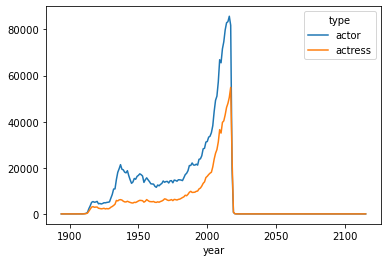

In [32]:
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year'>

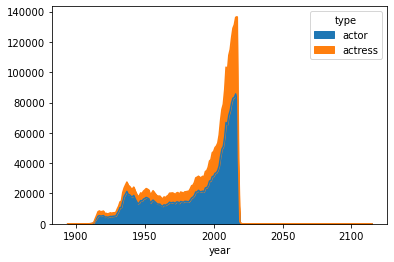

In [33]:
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [35]:
c['diff'] = c['actor'] - c['actress']

<AxesSubplot:xlabel='year'>

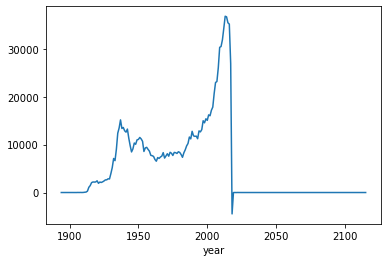

In [37]:
c['diff'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [38]:
c['fraction_actor'] = c['actor']/(c['actor']+c['actress'])

<AxesSubplot:xlabel='year'>

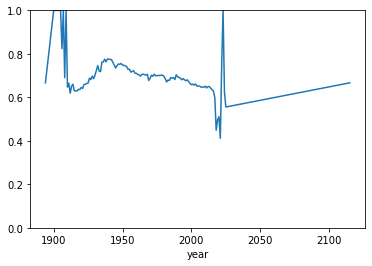

In [41]:
c['fraction_actor'].plot(ylim=(0,1))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [45]:
n2 = cast[cast['n'] == 2.0].groupby(['year','type']).size().unstack()

<AxesSubplot:xlabel='year'>

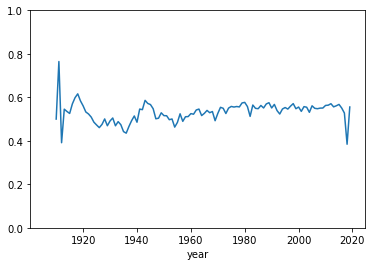

In [49]:
(n2['actor']/(n2['actor']+n2['actress'])).plot(ylim=(0,1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [50]:
a = cast[cast['n'] <= 3.0].groupby(['year','type']).size().unstack()

<AxesSubplot:xlabel='year'>

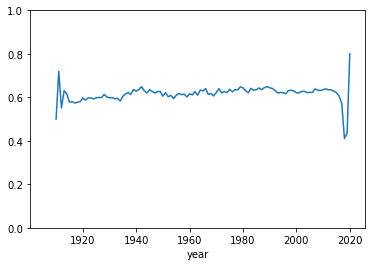

In [53]:
(a['actor']/(a['actor']+a['actress'])).plot(ylim = (0,1))